---
### Universidad del Valle de Guatemala<br>Modelación y simulación<br>Christopher García 20541
---

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Si se utilizó chatGPT para la generación y arreglos en el código. El proceso fue el siguiente:
- Descripción del problema
- Cosas puntuales que necesitaba (como que se mostrara la simulación con matplotlib, que tuviera ciertas características, etc.)
- Entre cada iteración del código iba pidiendo optimizaciones al código para que pudiera entenderlo por completo y también pudiera reflejar lo solicitado.
- Si tenía alguna duda y veía que no colaboraba le pedía una explicación teórica e iba implementando las cosas manualmente.

---
## Ejercicio#1
---

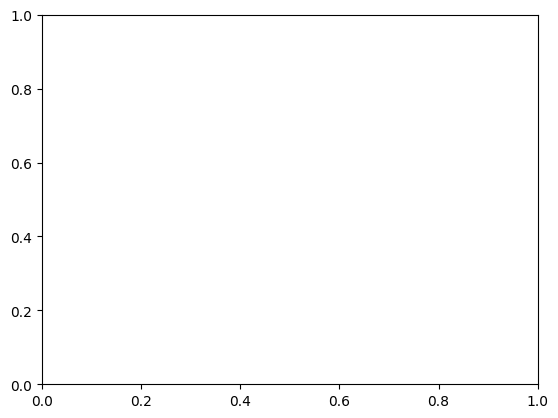

In [2]:
# Definición de la clase Agent para representar tanto depredadores como presas.
class Agent:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self):
        # Implementa el movimiento básico de un agente.
        self.x += random.uniform(-1, 1)
        self.y += random.uniform(-1, 1)

# Definición de la clase Predator (Depredador) con subclases para diferentes tipos de depredadores.
class Predator(Agent):
    def __init__(self, x, y, behavior):
        super().__init__(x, y)
        self.behavior = behavior

    def move(self, preys):
        # Implementa el movimiento del depredador según su comportamiento.
        if self.behavior == "cazador":
            # El cazador persigue a la presa más cercana.
            if preys:
                closest_prey = min(preys, key=lambda prey: ((prey.x - self.x) ** 2 + (prey.y - self.y) ** 2) ** 0.5)
                self.x += (closest_prey.x - self.x) / 10
                self.y += (closest_prey.y - self.y) / 10
        elif self.behavior == "emboscador":
            # El depredador emboscador se queda en su posición y espera a su presa.
            pass

# Función para simular la interacción entre depredadores y presas.
def simulate(num_predators, num_preys, num_obstacles, num_steps):
    predators = [Predator(random.uniform(0, 10), random.uniform(0, 5), random.choice(["cazador", "emboscador"])) for _ in range(num_predators)]
    preys = [Agent(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(num_preys)]
    obstacles = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(num_obstacles)]

    fig, ax = plt.subplots()

    def update(frame):
        nonlocal preys
        if not preys:
            ani.event_source.stop()
            plt.close()
            return

        for predator in predators:
            predator.move(preys)
        for prey in preys:
            prey.move()

        # Lógica para detectar y manejar interacciones entre depredadores y presas.
        for predator in predators:
            for prey in preys:
                if ((prey.x - predator.x) ** 2 + (prey.y - predator.y) ** 2) ** 0.5 < 0.5:
                    preys.remove(prey)

        ax.clear()
        for predator in predators:
            ax.scatter(predator.x, predator.y, c="red", label="Predator")
        for prey in preys:
            ax.scatter(prey.x, prey.y, c="blue", label="Prey")
        for obstacle in obstacles:
            ax.scatter(obstacle[0], obstacle[1], c="gray", marker="X")

        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)

    ani = FuncAnimation(fig, update, frames=num_steps, repeat=False, interval=100)
    plt.show()

# Simulación con 100 pasos, 2 depredadores, 5 presas y 3 obstáculos.
simulate(num_predators=3, num_preys=15, num_obstacles=3, num_steps=200)

¿Qué comportamientos puede observar en los depredadores?
- En esta simulación, hemos modelado dos tipos de comportamientos para los depredadores: "cazadores" y "emboscadores".
- Los cazadores persiguen activamente a sus presas, mientras que los emboscadores permanecen en su posición y esperan a sus presas.

¿Cómo mejoraría este modelo?
- Agregar más tipos de depredadores con comportamientos únicos.
- Implementar una lógica más sofisticada para las interacciones entre depredadores y presas, como la detección de proximidad y estrategias de caza.
- Incluir una representación más realista de obstáculos y cómo afectan los movimientos de los agentes.
- Utilizar una biblioteca de visualización más avanzada para crear una simulación más atractiva y comprensible.
- Experimentar con diferentes parámetros y reglas para observar cómo afectan el resultado de la simulación.

---
## Ejercicio#2
---

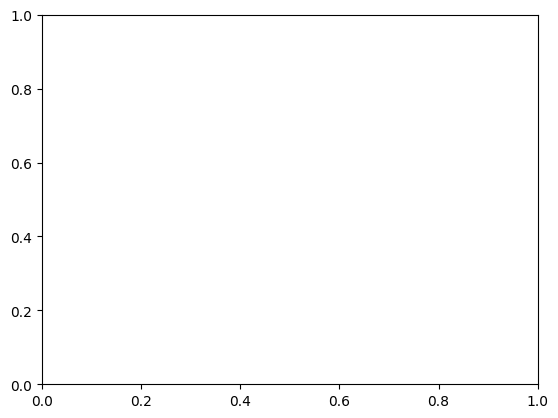

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [3]:
# Definición de la clase Vehicle para representar diferentes tipos de vehículos.
class Vehicle:
    def __init__(self, lane, speed, behavior):
        self.lane = lane
        self.speed = speed
        self.behavior = behavior
        self.position = random.uniform(0, 10)  # Posición inicial aleatoria en la carretera

    def move(self):
        # Implementa el movimiento básico de un vehículo.
        self.position += self.speed
        self.change_lane()  # Llamamos a la función de cambio de carril en cada actualización

    def change_lane(self):
        # Implementa el cambio de carril del vehículo (puede ser sobrescrito en subclases).
        pass

# Subclase de Vehicle para vehículos agresivos que cambian de carril con frecuencia.
class AggressiveVehicle(Vehicle):
    def change_lane(self):
        # Los vehículos agresivos cambian de carril con mayor frecuencia.
        if random.random() < 0.2:  # Probabilidad de cambiar de carril: 20%
            self.lane = random.randint(0, 2)  # Cambia de carril entre 0, 1 o 2

# Subclase de Vehicle para vehículos cautelosos que mantienen una distancia segura.
class CautiousVehicle(Vehicle):
    def change_lane(self):
        # Los vehículos cautelosos cambian de carril con menor frecuencia.
        if random.random() < 0.1:  # Probabilidad de cambiar de carril: 10%
            self.lane = random.randint(0, 2)  # Cambia de carril entre 0, 1 o 2

# Función para simular el flujo de tráfico con múltiples carriles y cerrar cuando no haya vehículos en pantalla.
def simulate(num_vehicles, num_lanes, num_steps):
    vehicles = [None] * num_vehicles

    # Inicializa vehículos con diferentes comportamientos y carriles.
    for i in range(num_vehicles):
        lane = random.randint(0, num_lanes - 1)  # Carril aleatorio entre 0 y num_lanes-1
        speed = random.uniform(0.5, 2.0)  # Velocidad aleatoria
        behavior = random.choice([AggressiveVehicle, CautiousVehicle])  # Comportamiento aleatorio
        vehicles[i] = behavior(lane, speed, behavior)

    fig, ax = plt.subplots()

    def update(frame):
        for vehicle in vehicles:
            vehicle.move()

        ax.clear()
        for vehicle in vehicles:
            ax.scatter(vehicle.position, vehicle.lane, c="blue" if isinstance(vehicle, CautiousVehicle) else "red", marker=">")

        ax.set_xlabel("Posición")
        ax.set_ylabel("Carril")
        ax.set_xlim(0, 10)
        ax.set_ylim(-0.5, num_lanes - 0.5)
        ax.set_yticks(range(num_lanes))
        ax.set_yticklabels([f"Carril {i}" for i in range(num_lanes)])
        plt.pause(0.5)  # Hacemos la simulación más lenta
        plt.draw()

        # Verificar si todos los vehículos han llegado al final de la carretera y cerrar si es el caso.
        if all(vehicle.position >= 10 for vehicle in vehicles):
            plt.close(fig)

    ani = FuncAnimation(fig, update, frames=num_steps, repeat=False, interval=100)
    plt.show()

# Simulación con 30 vehículos, 4 carriles y 100 pasos.
simulate(num_vehicles=30, num_lanes=4, num_steps=100)

¿Qué comportamientos puede observar en los diferentes tipos de comportamiento de manejo de vehículos?
- Vehículos agresivos: Cambian de carril con frecuencia, a menudo intentando adelantar a otros vehículos y superarlos.
- Vehículos cautelosos: Cambian de carril con menos frecuencia y mantienen una distancia segura con respecto a otros vehículos.

¿Cómo mejoraría este modelo?
- Agregando más comportamientos de manejo de vehículos y ajustando sus parámetros.
- Introducir condiciones de tráfico más realistas, como la congestión y las interacciones con semáforos y señales de tráfico.
- Considerar factores ambientales como el clima y su influencia en la velocidad y la visibilidad de los vehículos.
- Implementar una lógica más avanzada para el cambio de carril, considerando la velocidad y la posición de otros vehículos.
- Agregar más detalles de visualización, como gráficos de velocidad y distancia entre vehículos.

---
## Ejercicio#3
---

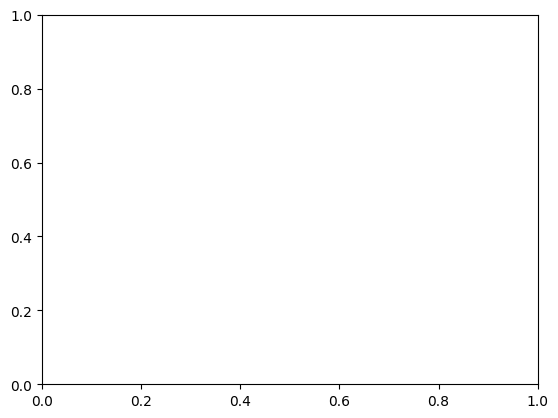

In [4]:
# Definición de la clase Buyer para representar diferentes segmentos de compradores.
class Buyer:
    def __init__(self, buyer_id, preference):
        self.buyer_id = buyer_id  # Identificador único para cada comprador
        self.preference = preference
        self.budget = random.uniform(50, 150)  # Presupuesto inicial aleatorio
        self.price_sensitivity = random.uniform(0.1, 0.7)  # Sensibilidad al precio aleatoria
        self.price = 0  # Precio actual

    def purchase(self):
        # Decide si comprar o no en función de la diferencia entre el precio y la preferencia.
        willingness_to_pay = self.preference * (1 - self.price_sensitivity)
        if self.price <= willingness_to_pay and self.budget >= self.price:
            self.budget -= self.price
            return True
        else:
            return False

    def update_price(self, market_demand, market_supply):
        # Ajusta el precio en función de la oferta y la demanda.
        excess_demand = market_demand - market_supply
        if excess_demand > 0:
            # Aumentar el precio si la demanda supera la oferta.
            self.price += random.uniform(1, 5)  # Incremento aleatorio
        elif excess_demand < 0:
            # Reducir el precio si la oferta supera la demanda.
            self.price -= random.uniform(1, 5)  # Decremento aleatorio
            if self.price < 0:
                self.price = 0  # Evitar precios negativos

# Subclase de Buyer para compradores de lujo.
class LuxuryBuyer(Buyer):
    def __init__(self, buyer_id):

        super().__init__(buyer_id, preference=random.uniform(0.7, 1.0))  # Preferencia alta

# Subclase de Buyer para compradores de presupuesto.
class BudgetBuyer(Buyer):
    def __init__(self, buyer_id):
        super().__init__(buyer_id, preference=random.uniform(0.1, 0.4))  # Preferencia baja

# Función para simular el mercado con múltiples compradores.
def simulate(num_buyers, num_steps):
    luxury_buyers = [LuxuryBuyer(i) for i in range(num_buyers // 2)]
    budget_buyers = [BudgetBuyer(i) for i in range(num_buyers // 2)]

    fig, ax = plt.subplots()

    market_prices = []  # Lista para registrar los precios en cada paso

    def update(frame):
        market_demand = sum(buyer.preference for buyer in luxury_buyers + budget_buyers)
        market_supply = random.uniform(0.8 * market_demand, 1.2 * market_demand)

        for buyer in luxury_buyers + budget_buyers:
            buyer.update_price(market_demand, market_supply)
            if buyer.purchase():
                market_prices.append((buyer.buyer_id, buyer.price))  # Registra el identificador y el precio

        ax.clear()
        prices = [price for _, price in market_prices]  # Extrae los precios
        ax.hist(prices, bins=20, color='skyblue', edgecolor='black')
        ax.set_xlabel("Precio")
        ax.set_ylabel("Cantidad de Compras")
        ax.set_title(f"Paso de Simulación: {frame}")

    ani = FuncAnimation(fig, update, frames=num_steps, repeat=False, interval=500)
    plt.show()

# Simulación con 100 compradores y 50 pasos.
simulate(num_buyers=100, num_steps=50)

¿Qué comportamientos puede observar en los diferentes tipos de preferencias y estrategias?
- Compradores de Lujo (preferencia alta): Compran productos a precios más altos y son menos sensibles a las fluctuaciones de precios.
- Compradores de Presupuesto (preferencia baja): Son más selectivos y solo compran productos cuando los precios son bajos y se ajustan a sus preferencias.
- Estrategias de Precios Dinámicos: Los precios aumentan cuando la demanda supera la oferta y disminuyen cuando ocurre lo contrario.

¿Cómo mejoraría este modelo?
- Segmentación más detallada: Agregar más segmentos de compradores con diferentes preferencias y estrategias.
- Interacción entre compradores y vendedores: Incluir vendedores que ajusten sus precios en respuesta a la demanda y la competencia.
- Consideración de la reputación: Introducir la reputación como factor que influye en las decisiones de compra.
- Visualización más detallada: Incluir gráficos adicionales que muestren la evolución de los precios y la oferta y la demanda.
- Optimización de parámetros: Ajustar los parámetros del modelo para obtener resultados más realistas.
- Análisis de resultados: Implementar métricas de evaluación y análisis para una comprensión más profunda de los efectos en el mercado.